In [271]:
import pandas as pd

In [272]:
data = [[1, 0, 0.002], [2, 20, 0.0012], [3, 30, 0.06]]
df = pd.DataFrame(data, columns = ["sn", "tem", "pres"])

In [273]:
df

,sn,tem,pres
0,1,0,0.0020
1,2,20,0.0012
2,3,30,0.0600


In [274]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [275]:
x

array([[ 0],
       [20],
       [30]])

In [276]:
y

array([0.002 , 0.0012, 0.06  ])

In [277]:
from sklearn.linear_model import LinearRegression

In [278]:
regressor = LinearRegression()

In [279]:
regressor.fit(x, y)

LinearRegression()

In [280]:
y_pred = regressor.predict(x)
y_pred

array([-0.00645714,  0.02657143,  0.04308571])

In [281]:
import matplotlib.pyplot as plt

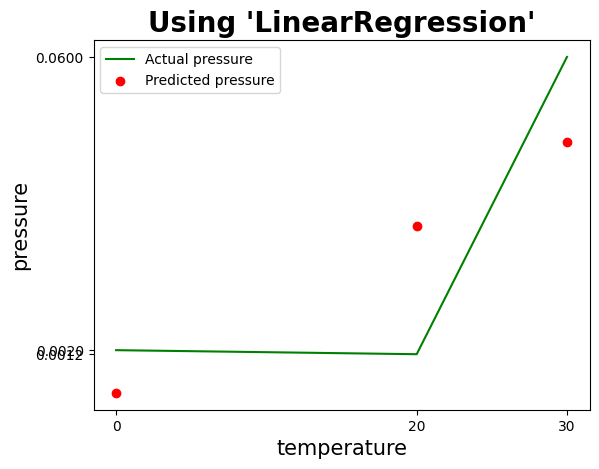

In [282]:
tem = df["tem"].tolist()
pre = df["pres"].tolist()

plt.plot(tem, pre, color = "green", label = "Actual pressure")
plt.scatter(tem, y_pred, color = "red", label = "Predicted pressure")
plt.xlabel("temperature", fontsize = 15)
plt.ylabel("pressure", fontsize = 15)
plt.xticks(tem)
plt.yticks(pre)
plt.legend()
plt.title("Using 'LinearRegression'", fontsize = 20, fontweight = "bold")

plt.show()

$y = mx+c$

_**Polynomial Regression**_

* First degree : $y = ax+b$
* Second degree : $y = ax^2+bx+c$
* Third degree : $y = ax^3+bx^2+cx+d$

In [283]:
from sklearn.preprocessing import PolynomialFeatures

In [284]:
poly = PolynomialFeatures(degree = 4)

In [285]:
x_poly = poly.fit_transform(x)
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02, 8.0e+03, 1.6e+05],
       [1.0e+00, 3.0e+01, 9.0e+02, 2.7e+04, 8.1e+05]])

If degree is the number of features $ie, N = 4$

then the number of feature is $N+1$. $ie,5$

In [286]:
regressor.fit(x_poly, y)

LinearRegression()

In [287]:
y_poly = regressor.predict(x_poly)
y_poly

array([0.002 , 0.0012, 0.06  ])

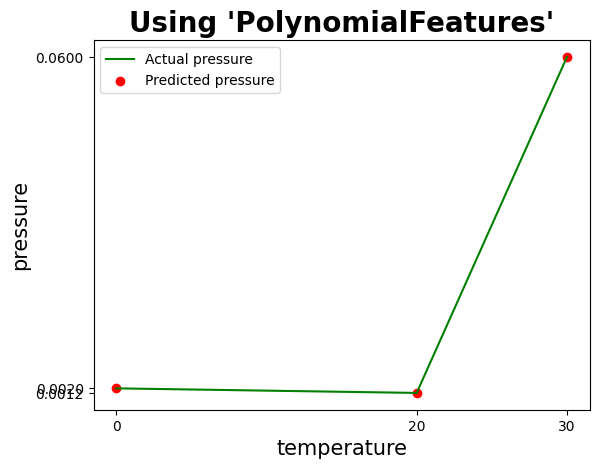

In [288]:
tem = df["tem"].tolist()
pre = df["pres"].tolist()

plt.plot(tem, pre, color = "green", label = "Actual pressure")
plt.scatter(tem, y_poly, color = "red", label = "Predicted pressure")
plt.xlabel("temperature", fontsize = 15)
plt.ylabel("pressure", fontsize = 15)
plt.xticks(tem)
plt.yticks(pre)
plt.legend()
plt.title("Using 'PolynomialFeatures'", fontsize = 20, fontweight = "bold")

plt.show()

In [289]:
dict01 = {"Actual value" : y, "Predicted value" : y_pred, "Polynomial value" : y_poly}
table01 = pd.DataFrame(dict01)
table01

,Actual value,Predicted value,Polynomial value
0,0.0020,-0.006457,0.0020
1,0.0012,0.026571,0.0012
2,0.0600,0.043086,0.0600


In [290]:
from sklearn.metrics import r2_score

In [291]:
print("r2_score obtained using 'LinearRegression' : ",r2_score(y, y_pred) )
print("r2_score obtained using 'PolynomialFeatures' : ",r2_score(y, y_poly) )

r2_score obtained using 'LinearRegression' :  0.5596684379460306
r2_score obtained using 'PolynomialFeatures' :  1.0


In [292]:
tem01 = int(input("Enter temperature: "))
tem01_poly = poly.fit_transform([[tem01]])
tem01_poly

Enter temperature: 13


array([[1.0000e+00, 1.3000e+01, 1.6900e+02, 2.1970e+03, 2.8561e+04]])

In [293]:
tem01_poly_pred = regressor.predict(tem01_poly)
tem01_poly_pred

array([-0.00169002])

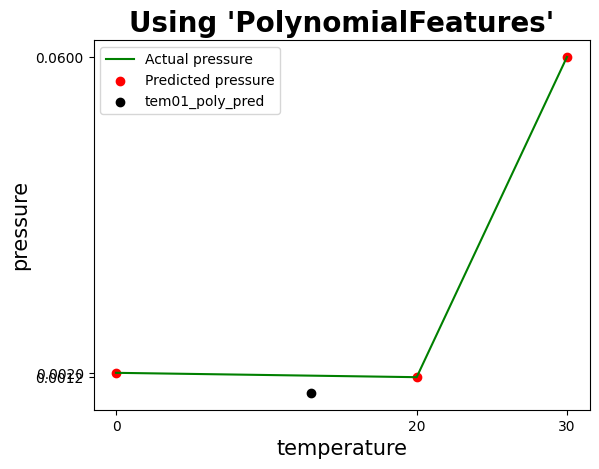

In [294]:
tem = df["tem"].tolist()
pre = df["pres"].tolist()

plt.plot(tem, pre, color = "green", label = "Actual pressure")
plt.scatter(tem, y_poly, color = "red", label = "Predicted pressure")
plt.scatter(tem01, tem01_poly_pred, color = "black", label = "tem01_poly_pred")
plt.xlabel("temperature", fontsize = 15)
plt.ylabel("pressure", fontsize = 15)
plt.xticks(tem)
plt.yticks(pre)
plt.legend()
plt.title("Using 'PolynomialFeatures'", fontsize = 20, fontweight = "bold")

plt.show()